# Load data sets

In [1]:
import glob
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def load_I(path):
    with open(path, 'rb') as f:
        _, _, q, I = pickle.load(f)
    
    return q, I


prj_fld = '/mnt/r/X-ray Temperature/'
save_fld = '/mnt/e/GitHub/papers/Publications/APS Temperature/figures/'

# Load calibration jets
# eth_#_I: DIM1: Trials (each temperature), DIM2: Features (intensity values)
with open('{0}/APS 2017-2/Processed/Ethanol/408/408_data.pckl'.format(prj_fld), 'rb') as f:
    eth_408_T, eth_408_q, eth_408_I = pickle.load(f)
eth_408_T = np.array(eth_408_T)
    
with open('{0}/APS 2017-2/Processed/Ethanol/409/409_data.pckl'.format(prj_fld), 'rb') as f:
    eth_409_T, eth_409_q, eth_409_I = pickle.load(f)
eth_409_T = np.array(eth_409_T)
    
with open('{0}/APS 2018-1/Processed/Ethanol_700umNozzle/RampDown/RampDown_data.pckl'.format(prj_fld), 'rb') as f:
    eth_RampDown_T, eth_RampDown_q, eth_RampDown_I = pickle.load(f)
eth_RampDown_T = np.array(eth_RampDown_T)

with open('{0}/APS 2018-1/Processed/Ethanol_700umNozzle/RampUp/RampUp_data.pckl'.format(prj_fld), 'rb') as f:
    eth_RampUp_T, eth_RampUp_q, eth_RampUp_I = pickle.load(f)
eth_RampUp_T = np.array(eth_RampUp_T)
    
with open('{0}/APS 2018-1/Processed/Ethanol_700umNozzle/Combined/Combined_data.pckl'.format(prj_fld), 'rb') as f:
    eth_Combined_T, eth_Combined_q, eth_Combined_I = pickle.load(f)
eth_Combined_T = np.array(eth_Combined_T)


# Load impinging jet cases
# Load constant T cases (2017)
ij_T_str = [x.rsplit('/')[-1][1:] for x in glob.glob('{0}/APS 2017-2/Processed/Ethanol/IJ Ramping/Temperature/T*'.format(prj_fld))]
ij_T = [float(x.replace('p', '.')) for x in ij_T_str]
ij_T_fld = '{0}/APS 2017-2/Processed/Ethanol/IJ Ramping/Temperature/Txyz/Txyz_data.pckl'.format(prj_fld)
# DIM1: Temperature (len=14), DIM2: y (len=16), DIM3: q (len=391)
ij = [load_I(ij_T_fld.replace('xyz', x)) for x in ij_T_str]
ij_T_q = [x[0] for x in ij]
ij_T_I = [x[1] for x in ij]

# Load constant y cases (2017)
ij_y_str = [x.rsplit('/')[-1][1:] for x in glob.glob('{0}/APS 2017-2/Processed/Ethanol/IJ Ramping/Positions/y*'.format(prj_fld))][:-1]
ij_y = [float(x.replace('p', '.')) for x in ij_y_str]
ij_y_fld = '{0}/APS 2017-2/Processed/Ethanol/IJ Ramping/Positions/yxyz/yxyz_data.pckl'.format(prj_fld)
# DIM1: y (len=16), DIM2: Temperature (len=14), DIM3: q (len=391)
ij = [load_I(ij_y_fld.replace('xyz', x)) for x in ij_y_str]
ij_y_q = [x[0] for x in ij]
ij_y_I = [x[1] for x in ij]

# Load cold EtOH IJ
with open('{0}/APS 2017-2/Processed/Ethanol/IJ Cold/IJ Cold_data.pckl'.format(prj_fld), 'rb') as f:
    eth_cold_y, eth_cold_q, eth_cold_I = pickle.load(f)
eth_cold_y = np.array(eth_cold_y)

# Load ambient EtOH IJ
with open('{0}/APS 2017-2/Processed/Ethanol/IJ Ambient/IJ Ambient_data.pckl'.format(prj_fld), 'rb') as f:
    eth_amb_y, eth_amb_q, eth_amb_I = pickle.load(f)
eth_amb_y = np.array(eth_amb_y)

# Load transverse case (2018)
with open('{0}/APS 2018-1/Processed/Ethanol/IJ65C/Transverse/Transverse_data.pckl'.format(prj_fld), 'rb') as f:
    eth_tran_y, eth_tran_q, eth_tran_I = pickle.load(f)
eth_tran_y = np.array(eth_tran_y)

# Load perpendicular case (2018)
with open('{0}/APS 2018-1/Processed/Ethanol/IJ65C/Perpendicular/Perpendicular_data.pckl'.format(prj_fld), 'rb') as f:
    eth_perp_y, eth_perp_q, eth_perp_I = pickle.load(f)
eth_perp_y = np.array(eth_perp_y)

# Collect all the data sets
data_ind = [408, 409, 'RampDown', 'RampUp', 'Combined']
I = [eth_408_I, eth_409_I, eth_RampDown_I, eth_RampUp_I, eth_Combined_I]
T = [eth_408_T, eth_409_T, eth_RampDown_T, eth_RampUp_T, eth_Combined_T]
q = [eth_408_q, eth_409_q, eth_RampDown_q, eth_RampUp_q, eth_Combined_q]

# Select training/testing sets
train = 409
test = 408

# Define sets
train_ind = data_ind.index(train)
test_ind = data_ind.index(test)

# Scaling flag
scaling = True

if scaling:
    scaling_str = 'scaling'
else:
    scaling_str = 'noscaling'
    
# Choose number of reduced components to use
reduced_comp = 2

# Tracking through specific q

Text(0.5, 1.0, 'Nozzle T = 281 K')

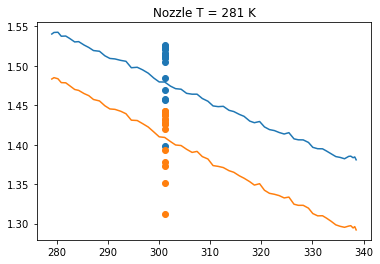

In [2]:
eth_ij_I = ij_T_I[0]

ind_var = np.argsort(-np.var(eth_408_I, axis=0))[0]
ind = np.argmax(eth_408_I, axis=1)
max_I = [x[ind[i]] for i, x in enumerate(eth_408_I)]
max_var_I = [x[ind_var] for i, x in enumerate(eth_408_I)]

max_I_ij = [x[ind[i]] for i, x in enumerate(eth_ij_I)]
max_var_I_ij = [x[ind_var] for i, x in enumerate(eth_ij_I)]

plt.plot(eth_408_T, max_I)
plt.scatter([301.2]*len(max_I_ij), max_I_ij)
plt.plot(eth_408_T, max_var_I)
plt.scatter([301.2]*len(max_var_I_ij), max_var_I_ij)
plt.title('Nozzle T = {0:0.0f} K'.format(ij_T[0]))

# KD-Tree

## KD-Tree on EtOH Ramping

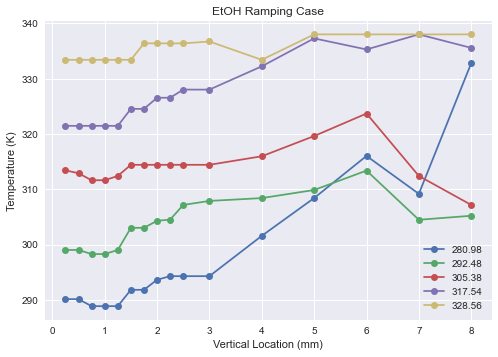

In [3]:
from scipy.spatial import cKDTree
matrix = eth_409_I

with plt.style.context(('seaborn')):
    for i in range(0, len(ij_T_I), 3):
        kd_ind = cKDTree(matrix).query(ij_T_I[i], k=2)
        interp_T = [np.average(a=eth_409_T[kd_ind[1][n]], weights=kd_ind[0][n]) 
                    for n,_ in enumerate(ij_T_I[i])]
        plt.plot(ij_y, interp_T, '-o', label='{0}'.format(ij_T[i]))

    plt.title('EtOH Ramping Case')
    plt.legend()
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/KDTree/etoh_ramping.png'.format(save_fld), dpi=600, bbox_inches='tight')
    plt.show()

## KD-Tree on EtOH Cold

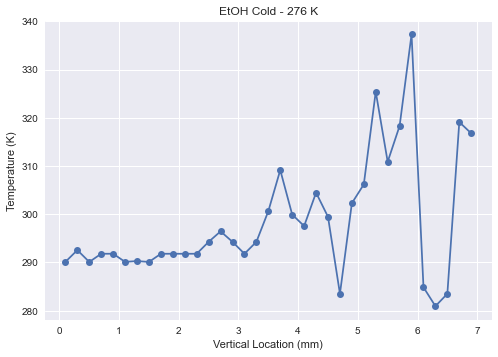

In [4]:
with plt.style.context(('seaborn')):

    kd_ind = cKDTree(matrix).query(eth_cold_I, k=2)
    interp_T = [np.average(a=eth_409_T[kd_ind[1][n]], weights=kd_ind[0][n]) 
                for n,_ in enumerate(eth_cold_I)]
    plt.plot(eth_cold_y, interp_T, '-o')

    plt.title('EtOH Cold - 276 K')
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/KDTree/etoh_cold_409.png'.format(save_fld), dpi=600, bbox_inches='tight')
    plt.show()

## KD-Tree on EtOH Ambient

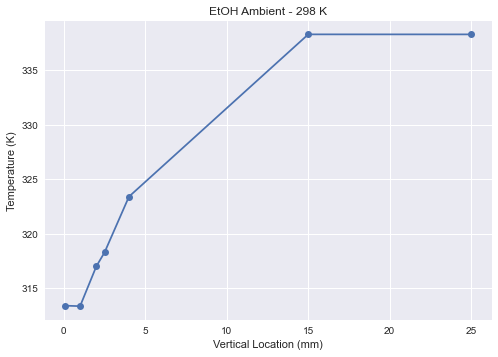

In [5]:
with plt.style.context(('seaborn')):

    kd_ind = cKDTree(matrix).query(eth_amb_I, k=2)
    interp_T = [np.average(a=eth_409_T[kd_ind[1][n]], weights=kd_ind[0][n]) 
                for n,_ in enumerate(eth_amb_I)]
    plt.plot(eth_amb_y, interp_T, '-o')

    plt.title('EtOH Ambient - 298 K')
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/KDTree/etoh_ambient_409.png'.format(save_fld), dpi=600, bbox_inches='tight')
    plt.show()

## KD-Tree on EtOH IJ Hot (2018)

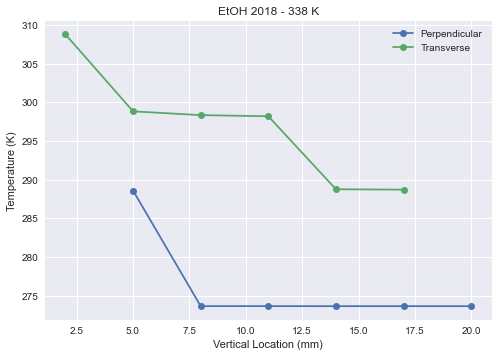

In [6]:
eth_heated = 65 + 273.15
matrix = eth_Combined_I

with plt.style.context(('seaborn')):
    kd_ind = cKDTree(matrix).query(eth_perp_I, k=2)
    perp_T = [np.average(a=eth_Combined_T[kd_ind[1][i]], weights=kd_ind[0][i]) 
              for i,_ in enumerate(eth_perp_y)]
    plt.plot(eth_perp_y, perp_T, '-o', label='Perpendicular')
    kd_ind = cKDTree(matrix).query(eth_tran_I, k=2)
    tran_T = [np.average(a=eth_Combined_T[kd_ind[1][i]], weights=kd_ind[0][i]) 
              for i,_ in enumerate(eth_tran_y)]
    plt.plot(eth_tran_y, tran_T, '-o', label='Transverse')

    plt.title('EtOH 2018 - {0:0.0f} K'.format(eth_heated))
    plt.legend()
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/KDTree/etoh_ij2018_Combined.png'.format(save_fld), dpi=600, bbox_inches='tight')
    plt.show()

# PCA
<https://nirpyresearch.com/classification-nir-spectra-principal-component-analysis-python/>

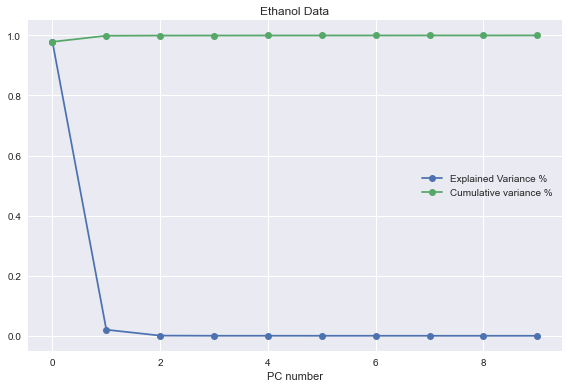

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA as sk_pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans

feat = eth_408_I

# Initialise
skpca1 = sk_pca(n_components=10)

# Scale the features to have zero mean and standard devisation of 1
# This is important when correlating data with very different variances
nfeat1 = StandardScaler(with_std=scaling).fit_transform(feat)

# Fit the spectral data and extract the explained variance ratio
X1 = skpca1.fit(nfeat1)
expl_var_1 = X1.explained_variance_ratio_

# Plot data
with plt.style.context(('seaborn')):
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    ax.plot(expl_var_1,'-o', label="Explained Variance %")
    ax.plot(np.cumsum(expl_var_1),'-o', label = 'Cumulative variance %')
    ax.set_xlabel("PC number")
    ax.set_title('Ethanol Data')
    plt.legend()
    plt.savefig('{0}/PCR/etoh_train{1}_{2}_variance.png'.format(save_fld, train, scaling_str), 
                dpi=600, bbox_inches='tight')
    plt.show()

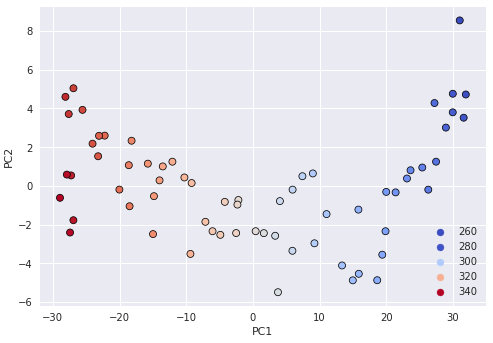

In [8]:
skpca1 = sk_pca(n_components=2)

# Transform on the scaled features
Xt1 = skpca1.fit_transform(nfeat1)

with plt.style.context(('seaborn')):
    sns.scatterplot(x=Xt1[:, 0], y=Xt1[:, 1], hue=eth_408_T, edgecolor='k', palette='coolwarm')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.savefig('{0}/PCR/etoh_train{1}_{2}_pcs.png'.format(save_fld, train, scaling_str), 
                dpi=600, bbox_inches='tight')

# PCR
https://nirpyresearch.com/principal-component-regression-python/

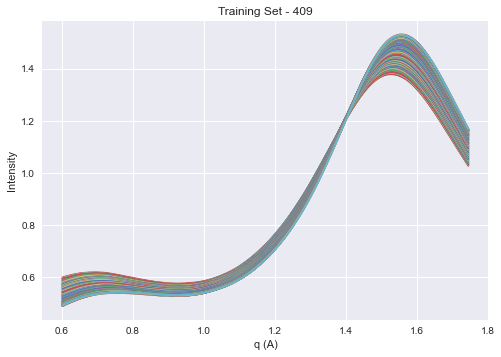

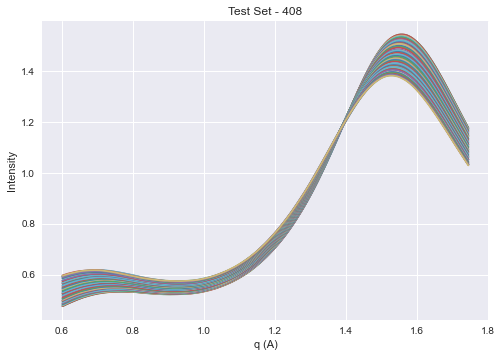

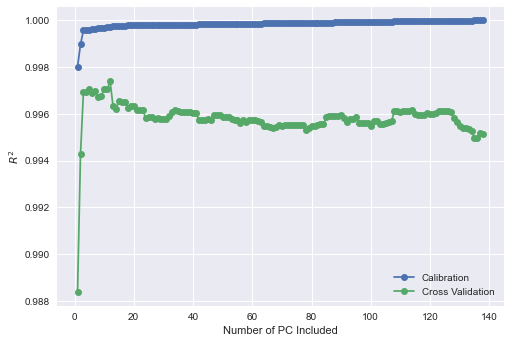

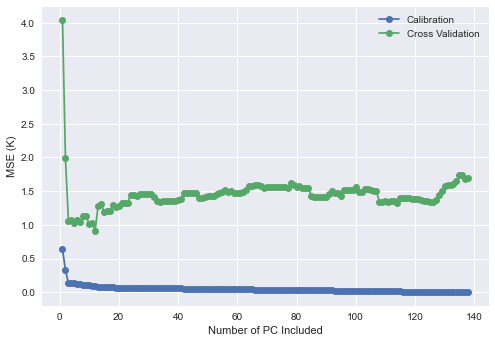

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score


def pcr(X1, y1, X2, y2, pc, scaling=scaling):
    'Principal Component Regression in Python'
    'Step 1: PCA on input data'
    
    # Define the PCA object
    pca = PCA(n_components=pc)

    # Standardize features by removing the mean and scaling to unit variance
    # Get the mean/sd for the training case, THEN USE THOSE SAME PARAMETERS for the test!
    # <https://datascience.stackexchange.com/a/27616>
    # Correlation matrix: with mean & std (magnitude and direction)
    # Covariance matrix: with mean, without std (direction)
    scaler = StandardScaler(with_mean=True, with_std=scaling)
    X1std = scaler.fit_transform(X1)
    X2std = scaler.transform(X2)

    # Run PCA producing the reduced variable Xred and select the first pc components
    X1reg = pca.fit_transform(X1std)[:,:pc]
    X2reg = pca.transform(X2std)[:,:pc]
    
    'Step 2: regression on selected principal components'

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Fit
    regr.fit(X1reg, y1)

    # Calibration
    y_c = regr.predict(X1reg)

    # Cross-validation
    #y_cv = cross_val_predict(regr, Xreg, y, cv=10)
    y_cv = regr.predict(X2reg)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y1, y_c)
    score_cv = r2_score(y2, y_cv)

    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y1, y_c)
    mse_cv = mean_squared_error(y2, y_cv)

    return(y_cv, score_c, score_cv, mse_c, mse_cv, pca)

X1 = I[train_ind]
y1 = T[train_ind]
q1 = q[train_ind]
X2 = I[test_ind]
y2 = T[test_ind]
q2 = q[test_ind]

# Interpolate the test q values to the training set
X2 = np.array([np.interp(x=q1, xp=q2, fp=n) for n in X2])
q2 = q1

# Plot training data
with plt.style.context(('seaborn')):
    plt.plot(q1, X1.T)
    plt.xlabel('q (A)')
    plt.ylabel('Intensity')
    plt.title('Training Set - {}'.format(train))
    plt.show()
    
# Plot test data
with plt.style.context(('seaborn')):
    plt.plot(q2, X2.T)
    plt.xlabel('q (A)')
    plt.ylabel('Intensity')
    plt.title('Test Set - {}'.format(test))
    plt.show()

# Run analysis on variable amount of PCs
# Default the upper limit to the number of training samples collected
predicted = [None] * len(X1)
r2r = [None] * len(predicted)
r2cv = [None] * len(predicted)
mser = [None] * len(predicted)
mscv = [None] * len(predicted)
pca = [None] * len(predicted)
for i in list(range(0, len(predicted))):
    predicted[i], r2r[i], r2cv[i], mser[i], mscv[i], pca[i] = pcr(X1, y1, X2, y2, 
                                                                  pc=i+1, scaling=scaling)
    
min_ind = np.argmin(mscv)
    
# R^2 vs. PC
with plt.style.context(('seaborn')):
    plt.plot(range(1, len(predicted)+1), r2r, '-o', label='Calibration')
    plt.plot(range(1, len(predicted)+1), r2cv, '-o', label='Cross Validation')
    plt.xlabel('Number of PC Included')
    plt.ylabel('$R^{2}$')
    plt.legend()
    plt.savefig('{0}/PCR/etoh_train{1}_test{2}_{3}_r2.png'
                .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
    plt.show()
    
# MSE vs. PC
with plt.style.context(('seaborn')):
    plt.plot(range(1, len(predicted)+1), mser, '-o', label='Calibration')
    plt.plot(range(1, len(predicted)+1), mscv, '-o', label='Cross Validation')
    plt.xlabel('Number of PC Included')
    plt.ylabel('MSE (K)')
    plt.legend()
    plt.savefig('{0}/PCR/etoh_train{1}_test{2}_{3}_mse.png'
                .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
    plt.show()

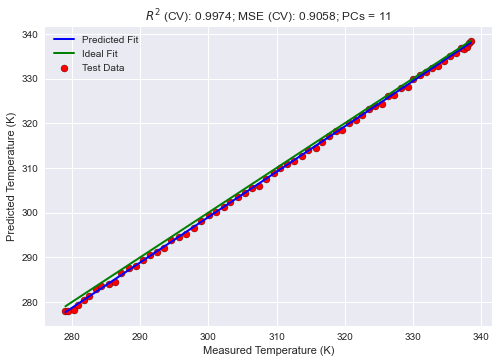

In [10]:
# Regression plot for optimal PC
pred = predicted[min_ind]
z = np.polyfit(y2, pred, 1)
with plt.style.context(('seaborn')):
    fig, ax = plt.subplots()
    ax.scatter(y2, pred, c='red', edgecolors='k', label='Test Data')
    ax.plot(y2, z[1]+z[0]*y2, c='blue', linewidth=2, label='Predicted Fit')
    ax.plot(y2, y2, color='green', linewidth=2, label='Ideal Fit')
    plt.legend()
    plt.title('$R^2$ (CV): {0:0.4f}; MSE (CV): {1:0.4f}; PCs = {2}'.format(r2cv[min_ind], mscv[min_ind], min_ind))
    plt.xlabel('Measured Temperature (K)')
    plt.ylabel('Predicted Temperature (K)')
    plt.savefig('{0}/PCR/etoh_train{1}_test{2}_{3}_compare.png'
                .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
    plt.show()

## PCR on EtOH Ramping
Run the PCR on the Ethanol IJ table scan and create Nozzle T line plots.

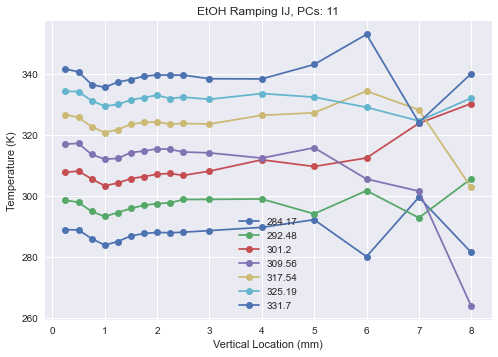

In [11]:
def interp_ij(x, xp, I):
    ij = [None] * len(I)
    for i, _ in enumerate(ij):
        ij[i] = np.interp(x=x, xp=xp, fp=I[i])
        
    return ij


# Run analysis on EtOH IJ
predicted = [None] * len(ij_T_I)
r2r = [None] * len(ij_T_I)
r2cv = [None] * len(ij_T_I)
mser = [None] * len(ij_T_I)
mscv = [None] * len(ij_T_I)
pca = [None] * len(ij_T_I)

pc_used = min_ind

for i in list(range(0, len(ij_T_I))):
    ij_T_I[i] = interp_ij(q1, ij_T_q[0], ij_T_I[i])
    predicted[i], r2r[i], r2cv[i], mser[i], mscv[i], pca[i] = pcr(X1, y1, ij_T_I[i], 
                                                                  np.repeat(ij_T[i], 
                                                                            len(ij_y_I)), 
                                                                  pc=pc_used, scaling=scaling)

with plt.style.context(('seaborn')):
    for i in range(1, len(ij_T_I), 2):
        plt.plot(ij_y, predicted[i], '-o', label='{0}'.format(ij_T[i]))

    plt.title('EtOH Ramping IJ, PCs: {}'.format(pc_used))
    plt.legend()
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PCR/etoh_train{1}_test{2}_{3}_ramping.png'
                .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
    plt.show()

## PCR on EtOH Cold

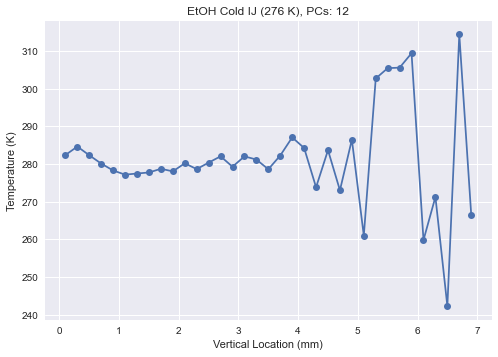

In [12]:
# Run analysis on EtOH Cold
pc_used = min_ind

eth_cold = 3 + 273.15

pred_cold, r2r_cold, r2cv_cold, mser_cold, mscv_cold, pca_cold = pcr(X1, y1, eth_cold_I, 
                                                                     np.repeat(eth_cold, 
                                                                               len(eth_cold_y)), 
                                                                     pc=pc_used, scaling=scaling)

with plt.style.context(('seaborn')):
    plt.plot(eth_cold_y, pred_cold, '-o')
    plt.title('EtOH Cold IJ ({0:0.0f} K), PCs: {1}'.format(eth_cold, pc_used+1))
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PCR/etoh_train{1}_test{2}_{3}_cold.png'
                .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
    plt.show()

## PCR on EtOH Ambient

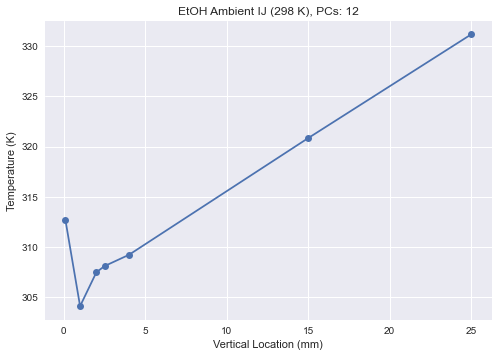

In [13]:
# Run analysis on EtOH Ambient
pc_used = min_ind

eth_amb = 25 + 273.15

pred_amb, r2r_amb, r2cv_amb, mser_amb, mscv_amb, pca_amb = pcr(X1, y1, eth_amb_I, 
                                                               np.repeat(eth_amb, 
                                                                         len(eth_amb_y)), 
                                                               pc=pc_used, scaling=scaling)

with plt.style.context(('seaborn')):
    plt.plot(eth_amb_y, pred_amb, '-o')
    plt.title('EtOH Ambient IJ ({0:0.0f} K), PCs: {1}'.format(eth_amb, pc_used+1))
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PCR/etoh_train{1}_test{2}_{3}_amb.png'
                .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
    plt.show()

## PCR on EtOH IJ Hot (2018)
Run the PCR on the heated Ethanol IJ from 2018.

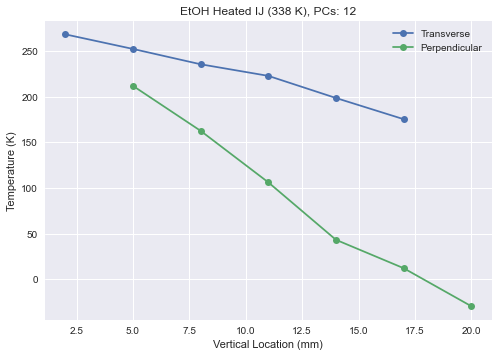

In [14]:
# Run analysis on EtOH IJ (2018)
pc_used = min_ind

eth_heated = 65 + 273.15

tran_interp = [np.interp(q1, eth_tran_q, x) for x in eth_tran_I]
pred_tran, r2r_tran, r2cv_tran, mser_tran, mscv_tran, pca_tran = pcr(X1, y1, tran_interp, 
                                                                     np.repeat(eth_heated, 
                                                                               len(eth_tran_y)), 
                                                                     pc=pc_used, scaling=scaling)

perp_interp = [np.interp(q1, eth_perp_q, x) for x in eth_perp_I]
pred_perp, r2r_perp, r2cv_perp, mser_perp, mscv_perp, pca_perp = pcr(X1, y1, perp_interp, 
                                                                     np.repeat(eth_heated, 
                                                                               len(eth_perp_y)), 
                                                                     pc=pc_used, scaling=scaling)

with plt.style.context(('seaborn')):
    plt.plot(eth_tran_y, pred_tran, '-o', label='Transverse')
    plt.plot(eth_perp_y, pred_perp, '-o', label='Perpendicular')    
    plt.title('EtOH Heated IJ ({0:0.0f} K), PCs: {1}'.format(eth_heated, pc_used+1))
    plt.legend()
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PCR/etoh_train{1}_test{2}_{3}_2018.png'
                .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
    plt.show()

# PLS
https://nirpyresearch.com/partial-least-squares-regression-python/

7% completed
Suggested number of components:  3



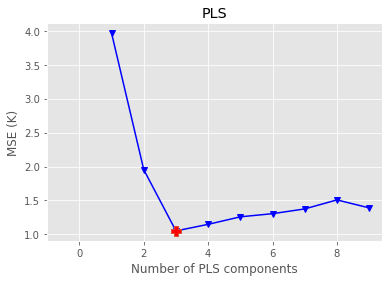

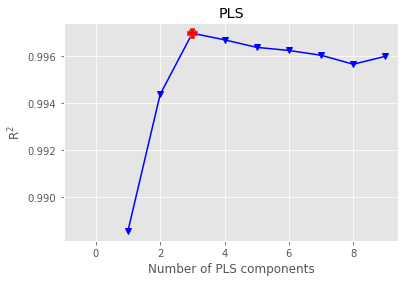

R2 calib: 1.000
R2 CV: 0.996
MSE calib: 0.117
MSE CV: 1.391


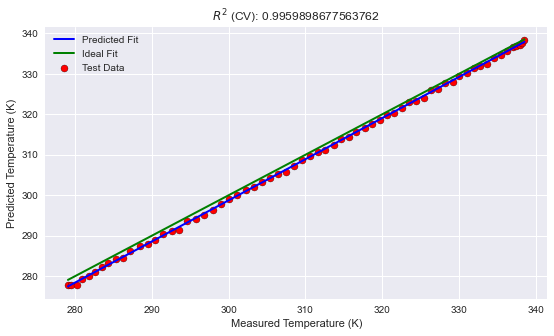

In [15]:
from sys import stdout
from sklearn.cross_decomposition import PLSRegression


def optimise_pls_cv(X1, y1, X2, y2, n_comp, plot_components=True, scaling=scaling):

    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''

    mse = []
    r2 = []
    component = np.arange(1, n_comp)

    for i in component:
        pls = PLSRegression(n_components=i, scale=scaling)
        pls.fit(X1, y1)

        # Cross-validation
        y_cv = pls.predict(X2)

        mse.append(mean_squared_error(y2, y_cv))
        r2.append(r2_score(y2, y_cv))

        comp = 100*(i+1)/len(X1)
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # Calculate and print the position of minimum in MSE
    r2max = np.argmax(r2)
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")

    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE (K)')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.savefig('{0}/PLS/etoh_train{1}_test{2}_{3}_mse.png'
                    .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
        plt.show()
        
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(r2), '-v', color = 'blue', mfc='blue')
            plt.plot(component[r2max], np.array(r2)[r2max], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('R$^2$')
            plt.title('PLS')
            plt.xlim(left=-1)
            plt.savefig('{0}/PLS/etoh_train{1}_test{2}_{3}_r2.png'
                        .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')

        plt.show()

    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1, scale=scaling)

    # Fit to the entire dataset
    pls_opt.fit(X1, y1)
    y_c = pls_opt.predict(X1)

    # Cross-validation
    y_cv = pls.predict(X2)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y1, y_c)
    score_cv = r2_score(y2, y_cv)

    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y1, y_c)
    mse_cv = mean_squared_error(y2, y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression and figures of merit
    rangey = max(y1) - min(y1)
    rangex = max(y_c) - min(y_c)

    # Fit a line to the CV vs response
    z1 = np.polyfit(y1, y_c, 1)
    z2 = np.polyfit(y2, y_cv, 1)
    with plt.style.context(('seaborn')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y2, y_cv, c='red', edgecolors='k', label='Test Data')
        #Plot the predicted line
        ax.plot(y2, z2[1]+z2[0]*y2, c='blue', linewidth=2, label='Predicted Fit')
        #Plot the ideal 1:1 line
        ax.plot(y2, y2, color='green', linewidth=2, label='Ideal Fit')
        plt.legend()
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Measured Temperature (K)')
        plt.ylabel('Predicted Temperature (K)')
        plt.savefig('{0}/PLS/etoh_train{1}_test{2}_{3}_compare.png'
                    .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')

        plt.show()
        
    ncomp = msemin+1

    return pls_opt, ncomp

pls_iter = min(10, len(X1)-1)

pls_opt, ncomp = optimise_pls_cv(X1, y1, X2, y2, pls_iter, plot_components=True)

## PLS on EtOH Ramping

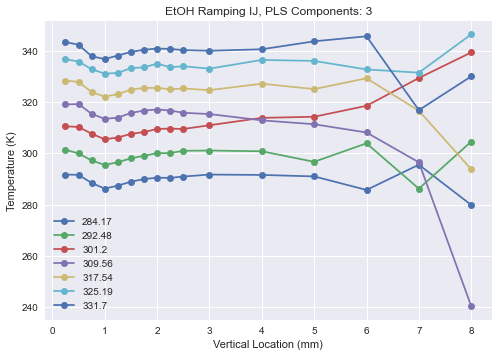

In [16]:
def pls_ij(X1, y1, X2, y2, n_comp):

    '''Run PLS with n_comp,
       and calculate MSE '''

    # Define PLS object with optimal number of components
    pls = PLSRegression(n_components=n_comp, scale=scaling)

    # Fit to the entire dataset
    pls.fit(X1, y1)
    y_c = pls.predict(X1)

    # Cross-validation
    y_cv = pls.predict(X2)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y1, y_c)
    score_cv = r2_score(y2, y_cv)

    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y1, y_c)
    mse_cv = mean_squared_error(y2, y_cv)
    
    return y_cv, score_c, score_cv, mse_c, mse_cv, pls


# Run analysis on EtOH IJ
predicted = [None] * len(ij_T_I)
r2r = [None] * len(ij_T_I)
r2cv = [None] * len(ij_T_I)
mser = [None] * len(ij_T_I)
mscv = [None] * len(ij_T_I)
ij_pls = [None] * len(ij_T_I)

for i in list(range(0, len(ij_T_I))):
    predicted[i], r2r[i], r2cv[i], mser[i], mscv[i], ij_pls[i] = pls_ij(X1, y1, ij_T_I[i], 
                                                                        np.repeat(ij_T[i], len(ij_y_I)), 
                                                                        n_comp=ncomp)

with plt.style.context(('seaborn')):
    for i in range(1, len(ij_T_I), 2):
        plt.plot(ij_y, predicted[i], '-o', label='{0}'.format(ij_T[i]))

    plt.title('EtOH Ramping IJ, PLS Components: {}'.format(ncomp))
    plt.legend()
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PLS/etoh_train{1}_test{2}_{3}_ramping.png'
                .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
    plt.show()

## PLS on EtOH Cold

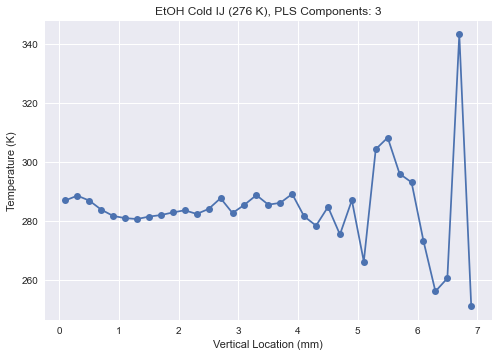

In [17]:
# Run analysis on EtOH Cold
eth_cold = 3 + 273.15

cold_interp = [np.interp(q1, eth_cold_q, x) for x in eth_cold_I]
pred_cold, r2r_cold, r2cv_cold, mser_cold, mscv_cold, pls_cold = pls_ij(X1, y1, cold_interp, 
                                                                        np.repeat(eth_cold, 
                                                                                  len(eth_cold_y)), 
                                                                        n_comp=ncomp)

with plt.style.context(('seaborn')):
    plt.plot(eth_cold_y, pred_cold, '-o')
    plt.title('EtOH Cold IJ ({0:0.0f} K), PLS Components: {1}'.format(eth_cold, ncomp))
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PLS/etoh_train{1}_test{2}_{3}_cold.png'
                .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
    plt.show()

## PLS on EtOH Ambient

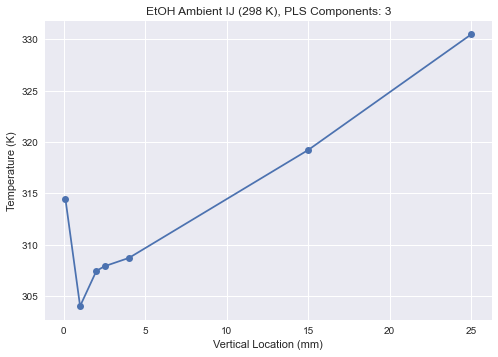

In [18]:
# Run analysis on EtOH Ambient
eth_amb = 25 + 273.15

amb_interp = [np.interp(q1, eth_amb_q, x) for x in eth_amb_I]
pred_amb, r2r_amb, r2cv_amb, mser_amb, mscv_amb, pls_amb = pls_ij(X1, y1, amb_interp, 
                                                                  np.repeat(eth_amb, 
                                                                            len(eth_amb_y)), 
                                                                  n_comp=ncomp)

with plt.style.context(('seaborn')):
    plt.plot(eth_amb_y, pred_amb, '-o')
    plt.title('EtOH Ambient IJ ({0:0.0f} K), PLS Components: {1}'.format(eth_amb, ncomp))
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PLS/etoh_train{1}_test{2}_{3}_amb.png'
                .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
    plt.show()

## PLS on EtOH IJ Hot (2018)

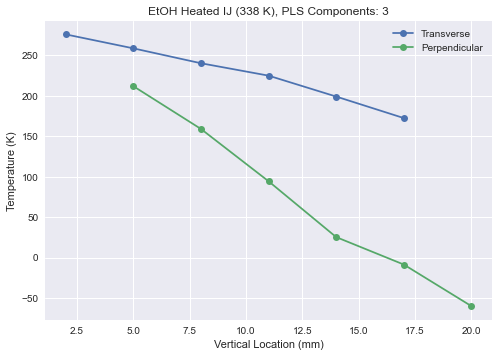

In [19]:
# Run analysis on EtOH IJ (2018)
eth_heated = 65 + 273.15

tran_interp = [np.interp(q1, eth_tran_q, x) for x in eth_tran_I]
pred_tran, r2r_tran, r2cv_tran, mser_tran, mscv_tran, pls_tran = pls_ij(X1, y1, tran_interp, 
                                                                        np.repeat(eth_heated, 
                                                                                  len(eth_tran_y)), 
                                                                        n_comp=ncomp)

perp_interp = [np.interp(q1, eth_perp_q, x) for x in eth_perp_I]
pred_perp, r2r_perp, r2cv_perp, mser_perp, mscv_perp, pls_perp = pls_ij(X1, y1, perp_interp, 
                                                                        np.repeat(eth_heated, 
                                                                                  len(eth_perp_y)), 
                                                                        n_comp=ncomp)

with plt.style.context(('seaborn')):
    plt.plot(eth_tran_y, pred_tran, '-o', label='Transverse')
    plt.plot(eth_perp_y, pred_perp, '-o', label='Perpendicular')    
    plt.title('EtOH Heated IJ ({0:0.0f} K), PLS Components: {1}'.format(eth_heated, ncomp))
    plt.legend()
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PLS/etoh_train{1}_test{2}_{3}_2018.png'
                .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
    plt.show()

# PLS w/ Feature Selection
https://nirpyresearch.com/variable-selection-method-pls-python/

100% completed
Optimised number of PLS components:  3
Q values to be discarded  370
Optimised MSEP  0.4478869088234692



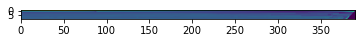

In [57]:
def pls_variable_selection(X1, y1, X2, y2, max_comp, scaling=scaling):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X1.shape[1]))

    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1, scale=scaling)
        pls1.fit(X1, y1)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))

        # Sort spectra accordingly 
        X1c = X1[:,sorted_ind]
        X2c = X2[:,sorted_ind]

        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(X1c.shape[1]-(i+1)):

            pls2 = PLSRegression(n_components=i+1, scale=scaling)
            pls2.fit(X1c[:, j:], y1)

            y_cv = pls2.predict(X2c[:, j:])

            mse[i,j] = mean_squared_error(y2, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))

    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Q values to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
    plt.imshow(mse, interpolation=None)
    plt.show()

    
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1, scale=scaling)
    pls_final = pls.fit(X1, y1)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))

    X1c = X1[:,sorted_ind]
    

    return(X1c[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind, pls_final)


pls_iter = min(10, len(X1)-1)

opt_Xc, ncomp, wav, sorted_ind, pls = pls_variable_selection(X1, y1, X2, y2, pls_iter)

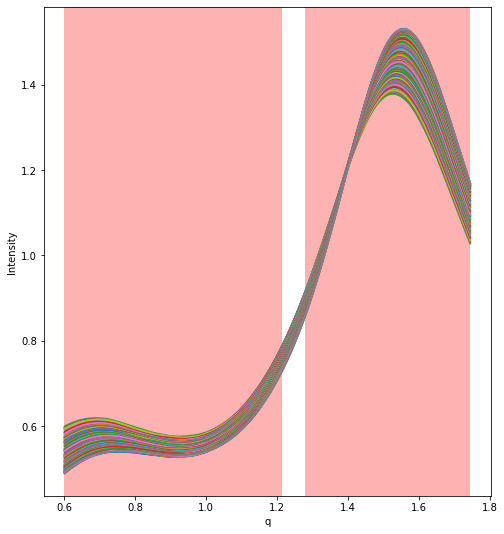

In [21]:
# Get a boolean array according to the indices that are being discarded
ix = np.in1d(q1.ravel(), q1[sorted_ind][:wav])

import matplotlib.collections as collections

# Plot spectra with superimpose selected bands
fig, ax = plt.subplots(figsize=(8,9))
with plt.style.context(('seaborn')):
    ax.plot(q1, X1.T)
    plt.ylabel('Intensity')
    plt.xlabel('q')

collection = collections.BrokenBarHCollection.span_where(
    q1, ymin=-1, ymax=2, where=ix == True, facecolor='red', alpha=0.3)
ax.add_collection(collection)
plt.savefig('{0}/PLS_Reduced/etoh_train{1}_test{2}_{3}_featselect.png'
            .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
plt.show()

## PLS w/ Feature Selection on EtOH Ramping

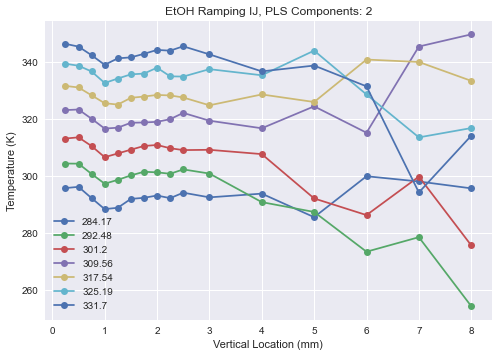

In [22]:
q1_cropped = np.array(q1[ix == False])
X1_cropped = np.array([x[ix == False] for x in X1])
X2_cropped = np.array([x[ix == False] for x in X2])
q2_cropped = np.array(q2[ix == False])

ncomp = reduced_comp

def crop_ij(I):
    ij = [None] * len(I)
    for i, _ in enumerate(ij):
        ij[i] = I[i][ix == False]
        
    return ij


# Run analysis on EtOH IJ
predicted = [None] * len(ij_T_I)
r2r = [None] * len(ij_T_I)
r2cv = [None] * len(ij_T_I)
mser = [None] * len(ij_T_I)
mscv = [None] * len(ij_T_I)
ij_pls = [None] * len(ij_T_I)

for i in list(range(0, len(ij_T_I))):
    ij_cropped = crop_ij(ij_T_I[i])
    predicted[i], r2r[i], r2cv[i], mser[i], mscv[i], ij_pls[i] = pls_ij(X1_cropped, y1, ij_cropped, 
                                                                        np.repeat(ij_T[i], len(ij_y_I)), 
                                                                        n_comp=ncomp)

with plt.style.context(('seaborn')):
    for i in range(1, len(ij_T_I), 2):
        plt.plot(ij_y, predicted[i], '-o', label='{0}'.format(ij_T[i]))

    plt.title('EtOH Ramping IJ, PLS Components: {}'.format(ncomp))
    plt.legend()
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PLS_Reduced/etoh_train{1}_test{2}_{3}_{4}comp_ramping.png'
                .format(save_fld, train, test, scaling_str, reduced_comp), dpi=600, 
                bbox_inches='tight')
    plt.show()

## PLS w/ Feature Selection on EtOH Cold

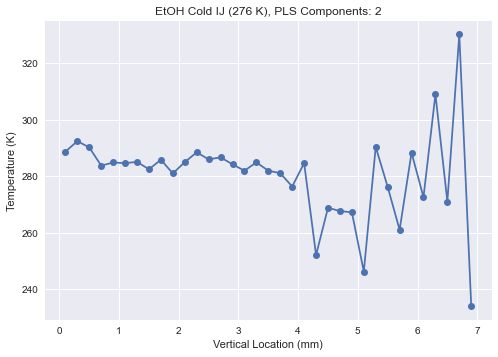

In [23]:
# Run analysis on EtOH Cold
eth_cold = 3 + 273.15

cold_interp = [np.interp(q1, eth_cold_q, x) for x in eth_cold_I]
cold_cropped = [x[ix == False] for x in cold_interp]
pred_cold, r2r_cold, r2cv_cold, mser_cold, mscv_cold, pls_cold = pls_ij(X1_cropped, y1, cold_cropped, 
                                                                        np.repeat(eth_cold, 
                                                                                  len(eth_cold_y)), 
                                                                        n_comp=ncomp)

with plt.style.context(('seaborn')):
    plt.plot(eth_cold_y, pred_cold, '-o')
    plt.title('EtOH Cold IJ ({0:0.0f} K), PLS Components: {1}'.format(eth_cold, ncomp))
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PLS_Reduced/etoh_train{1}_test{2}_{3}_{4}comp_cold.png'
                .format(save_fld, train, test, scaling_str, reduced_comp), dpi=600, 
                bbox_inches='tight')
    plt.show()

## PLS w/ Feature Selection on EtOH Ambient

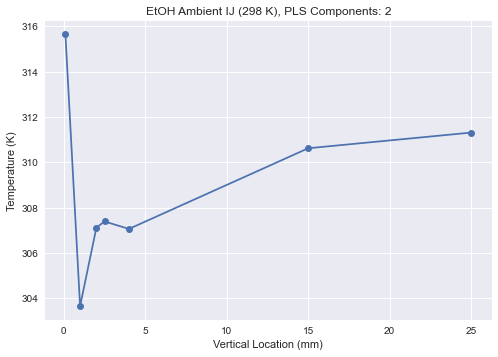

In [24]:
# Run analysis on EtOH Ambient
eth_amb = 25 + 273.15

amb_interp = [np.interp(q1, eth_amb_q, x) for x in eth_amb_I]
amb_cropped = [x[ix == False] for x in amb_interp]
pred_amb, r2r_amb, r2cv_amb, mser_amb, mscv_amb, pls_amb = pls_ij(X1_cropped, y1, amb_cropped, 
                                                                  np.repeat(eth_amb, 
                                                                            len(eth_amb_y)), 
                                                                  n_comp=ncomp)

with plt.style.context(('seaborn')):
    plt.plot(eth_amb_y, pred_amb, '-o')
    plt.title('EtOH Ambient IJ ({0:0.0f} K), PLS Components: {1}'.format(eth_amb, ncomp))
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PLS_Reduced/etoh_train{1}_test{2}_{3}_{4}comp_amb.png'
                .format(save_fld, train, test, scaling_str, reduced_comp), dpi=600, 
                bbox_inches='tight')
    plt.show()

## PLS w/ Feature Selection on EtOH IJ Hot (2018)

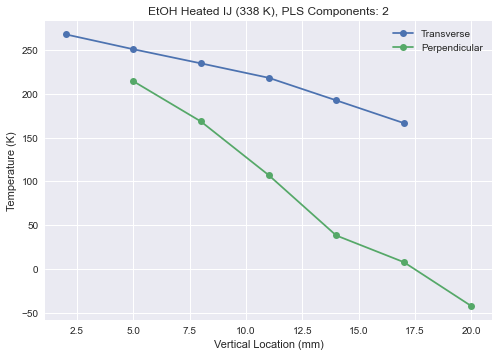

In [25]:
# Run analysis on EtOH IJ (2018)
eth_heated = 65 + 273.15

tran_interp = [np.interp(q1, eth_tran_q, x) for x in eth_tran_I]
tran_cropped = [x[ix == False] for x in tran_interp]
pred_tran, r2r_tran, r2cv_tran, mser_tran, mscv_tran, pls_tran = pls_ij(X1_cropped, y1, tran_cropped, 
                                                                        np.repeat(eth_heated, 
                                                                                  len(eth_tran_y)), 
                                                                        n_comp=ncomp)

perp_interp = [np.interp(q1, eth_perp_q, x) for x in eth_perp_I]
perp_cropped = [x[ix == False] for x in perp_interp]
pred_perp, r2r_perp, r2cv_perp, mser_perp, mscv_perp, pls_perp = pls_ij(X1_cropped, y1, perp_cropped, 
                                                                        np.repeat(eth_heated, 
                                                                                  len(eth_perp_y)), 
                                                                        n_comp=ncomp)

with plt.style.context(('seaborn')):
    plt.plot(eth_tran_y, pred_tran, '-o', label='Transverse')
    plt.plot(eth_perp_y, pred_perp, '-o', label='Perpendicular')    
    plt.title('EtOH Heated IJ ({0:0.0f} K), PLS Components: {1}'.format(eth_heated, ncomp))
    plt.legend()
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PCR/etoh_train{1}_test{2}_{3}_{4}comp_2018.png'
                .format(save_fld, train, test, scaling_str, reduced_comp), dpi=600, 
                bbox_inches='tight')
    plt.show()

# PCR w/ Feature Selection

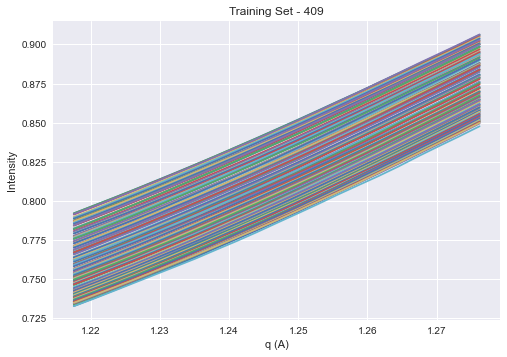

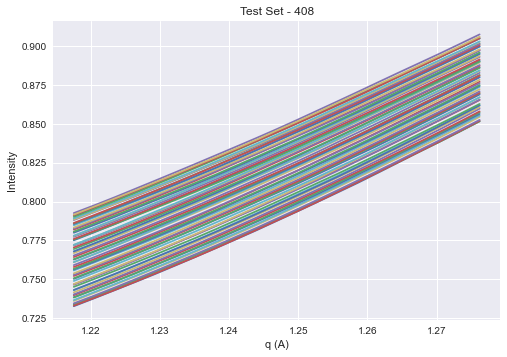

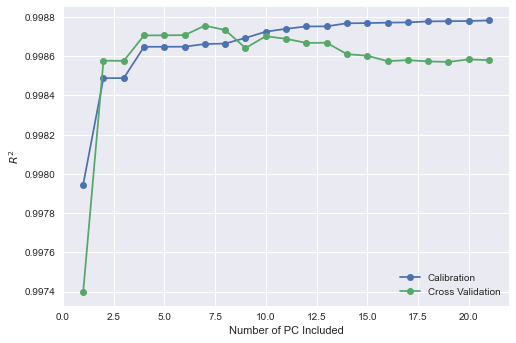

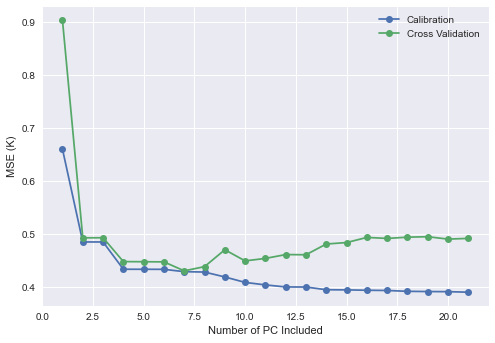

In [26]:
# Plot training data
with plt.style.context(('seaborn')):
    plt.plot(q1_cropped, X1_cropped.T)
    plt.xlabel('q (A)')
    plt.ylabel('Intensity')
    plt.title('Training Set - {}'.format(train))
    plt.show()
    
# Plot test data
with plt.style.context(('seaborn')):
    plt.plot(q2_cropped, X2_cropped.T)
    plt.xlabel('q (A)')
    plt.ylabel('Intensity')
    plt.title('Test Set - {}'.format(test))
    plt.show()

# Run analysis on variable amount of PCs
# Default the upper limit to the number of training samples collected
predicted = [None] * len(X1_cropped.T)
r2r = [None] * len(predicted)
r2cv = [None] * len(predicted)
mser = [None] * len(predicted)
mscv = [None] * len(predicted)
pca = [None] * len(predicted)
for i in list(range(0, len(X1_cropped.T))):
    predicted[i], r2r[i], r2cv[i], mser[i], mscv[i], pca[i] = pcr(X1_cropped, y1, X2_cropped, 
                                                                  y2, pc=i+1)
    
min_ind = np.argmin(mscv)
    
# R^2 vs. PC
with plt.style.context(('seaborn')):
    plt.plot(range(1, len(predicted)+1), r2r, '-o', label='Calibration')
    plt.plot(range(1, len(predicted)+1), r2cv, '-o', label='Cross Validation')
    plt.xlabel('Number of PC Included')
    plt.ylabel('$R^{2}$')
    plt.legend()
    plt.savefig('{0}/PCR_Reduced/etoh_train{1}_test{2}_{3}_r2.png'
                .format(save_fld, train, test, scaling_str), dpi=600, bbox_inches='tight')
    plt.show()
    
# MSE vs. PC
with plt.style.context(('seaborn')):
    plt.plot(range(1, len(predicted)+1), mser, '-o', label='Calibration')
    plt.plot(range(1, len(predicted)+1), mscv, '-o', label='Cross Validation')
    plt.xlabel('Number of PC Included')
    plt.ylabel('MSE (K)')
    plt.legend()
    plt.savefig('{0}/PCR_Reduced/etoh_train{1}_test{2}_{3}_{4}comp_mse.png'
                .format(save_fld, train, test, scaling_str, reduced_comp), dpi=600, 
                bbox_inches='tight')
    plt.show()

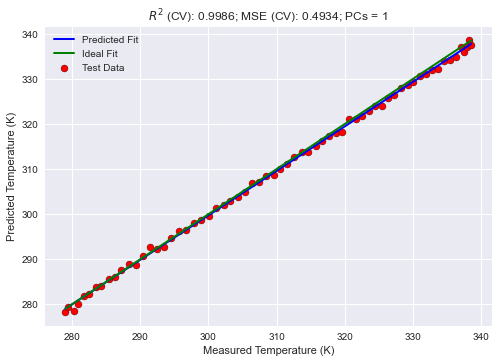

In [27]:
# Regression plot for chosen PC
min_ind = reduced_comp - 1
pred = predicted[min_ind]
z = np.polyfit(y2, pred, 1)
with plt.style.context(('seaborn')):
    fig, ax = plt.subplots()
    ax.scatter(y2, pred, c='red', edgecolors='k', label='Test Data')
    ax.plot(y2, z[1]+z[0]*y2, c='blue', linewidth=2, label='Predicted Fit')
    ax.plot(y2, y2, color='green', linewidth=2, label='Ideal Fit')
    plt.legend()
    plt.title('$R^2$ (CV): {0:0.4f}; MSE (CV): {1:0.4f}; PCs = {2}'.format(r2cv[min_ind], mscv[min_ind], min_ind))
    plt.xlabel('Measured Temperature (K)')
    plt.ylabel('Predicted Temperature (K)')
    plt.savefig('{0}/PCR_Reduced/etoh_train{1}_test{2}_{3}_{4}comp_compare.png'
                .format(save_fld, train, test, scaling_str, reduced_comp), dpi=600, bbox_inches='tight')
    plt.show()

## PCR w/ Feature Selection on EtOH Ramping

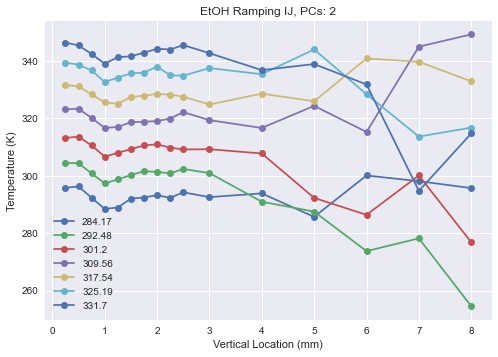

In [28]:
# Run analysis on EtOH IJ
predicted = [None] * len(ij_T_I)
r2r = [None] * len(ij_T_I)
r2cv = [None] * len(ij_T_I)
mser = [None] * len(ij_T_I)
mscv = [None] * len(ij_T_I)
pca = [None] * len(ij_T_I)

pc_used = reduced_comp

for i in list(range(0, len(ij_T_I))):
    ij_T_I[i] = interp_ij(q1, ij_T_q[0], ij_T_I[i])
    ij_cropped = crop_ij(ij_T_I[i])
    predicted[i], r2r[i], r2cv[i], mser[i], mscv[i], pca[i] = pcr(X1_cropped, y1, ij_cropped, 
                                                                  np.repeat(ij_T[i], 
                                                                            len(ij_y_I)), 
                                                                  pc=pc_used)

with plt.style.context(('seaborn')):
    for i in range(1, len(ij_T_I), 2):
        plt.plot(ij_y, predicted[i], '-o', label='{0}'.format(ij_T[i]))

    plt.title('EtOH Ramping IJ, PCs: {}'.format(pc_used))
    plt.legend()
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PCR_Reduced/etoh_train{1}_test{2}_{3}_{4}comp_ramping.png'
                .format(save_fld, train, test, scaling_str, reduced_comp), dpi=600, 
                bbox_inches='tight')
    plt.show()

## PCR w/ Feature Selection on EtOH Cold

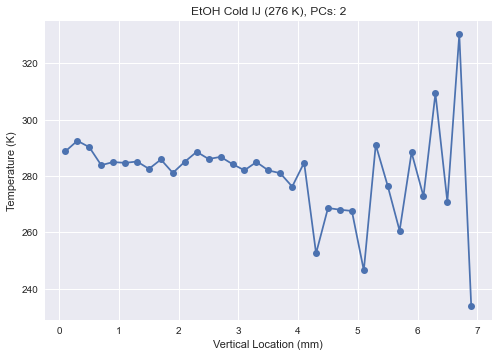

In [29]:
# Run analysis on EtOH Cold
eth_cold = 3 + 273.15

pred_cold, r2r_cold, r2cv_cold, mser_cold, mscv_cold, pls_cold = pcr(X1_cropped, y1, cold_cropped, 
                                                                     np.repeat(eth_cold, 
                                                                               len(eth_cold_y)), 
                                                                     pc=pc_used)

with plt.style.context(('seaborn')):
    plt.plot(eth_cold_y, pred_cold, '-o')
    plt.title('EtOH Cold IJ ({0:0.0f} K), PCs: {1}'.format(eth_cold, pc_used))
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PCR_Reduced/etoh_train{1}_test{2}_{3}_{4}comp_cold.png'
                .format(save_fld, train, test, scaling_str, reduced_comp), dpi=600, 
                bbox_inches='tight')
    plt.show()

## PCR w/ Feature Selection on EtOH Ambient

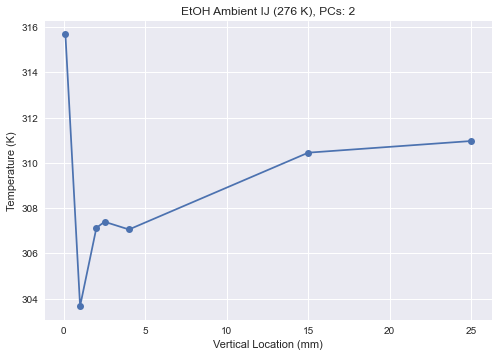

In [30]:
# Run analysis on EtOH Cold
eth_amb = 3 + 273.15

pred_amb, r2r_amb, r2cv_amb, mser_amb, mscv_amb, pls_amb = pcr(X1_cropped, y1, amb_cropped, 
                                                               np.repeat(eth_amb, 
                                                                         len(eth_amb_y)), 
                                                               pc=pc_used)

with plt.style.context(('seaborn')):
    plt.plot(eth_amb_y, pred_amb, '-o')
    plt.title('EtOH Ambient IJ ({0:0.0f} K), PCs: {1}'.format(eth_amb, pc_used))
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PCR_Reduced/etoh_train{1}_test{2}_{3}_{4}comp_amb.png'
                .format(save_fld, train, test, scaling_str, reduced_comp), dpi=600, 
                bbox_inches='tight')
    plt.show()

## PCR w/ Feature Selection on EtOH IJ Hot (2018)

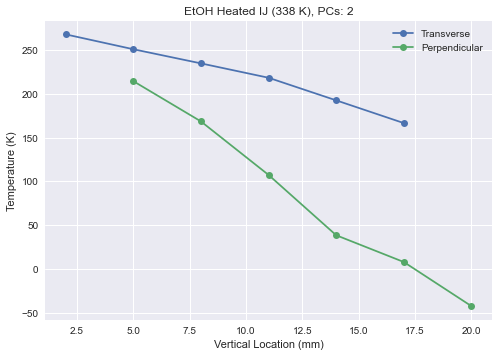

In [31]:
# Run analysis on EtOH IJ (2018)
eth_heated = 65 + 273.15

pred_tran, r2r_tran, r2cv_tran, mser_tran, mscv_tran, pls_tran = pcr(X1_cropped, y1, tran_cropped, 
                                                                     np.repeat(eth_heated, 
                                                                               len(eth_tran_y)), 
                                                                     pc=pc_used)

pred_perp, r2r_perp, r2cv_perp, mser_perp, mscv_perp, pls_perp = pcr(X1_cropped, y1, perp_cropped, 
                                                                     np.repeat(eth_heated, 
                                                                               len(eth_perp_y)), 
                                                                     pc=pc_used)

with plt.style.context(('seaborn')):
    plt.plot(eth_tran_y, pred_tran, '-o', label='Transverse')
    plt.plot(eth_perp_y, pred_perp, '-o', label='Perpendicular')    
    plt.title('EtOH Heated IJ ({0:0.0f} K), PCs: {1}'.format(eth_heated, pc_used))
    plt.legend()
    plt.xlabel('Vertical Location (mm)')
    plt.ylabel('Temperature (K)')
    plt.savefig('{0}/PCR_Reduced/etoh_train{1}_test{2}_{3}_{4}comp_2018.png'
                .format(save_fld, train, test, scaling_str, reduced_comp), dpi=600, 
                bbox_inches='tight')
    plt.show()